# INTRODUCTION

This analysis is to examine if any correlation exists between Christopher Walken's movie career and use of cowbell in popular music.

Most internet searches of "Best SNL Sketch" will include "More Cowbell" somewhere on their list, if not at the number one spot.[(source)](https://www.eonline.com/news/1140387/ranking-the-best-saturday-night-live-sketches-of-all-time) Airing on April 8, 2000, it very quickly became a pop culture phenomenon.[(source)](https://www.vanityfair.com/hollywood/2019/11/more-cowbell-ruined-christopher-walkens-life-will-ferrell-claims) 

You can watch the sketch [here](https://www.youtube.com/watch?v=cVsQLlk-T0s).

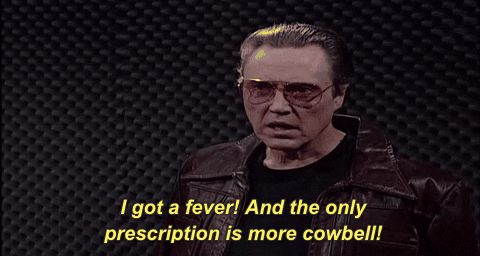

In [1]:
from IPython.display import Image
Image(filename = "./images/walken.gif")

# METHODOLOGY

## Collect Data

Sample size was comprised of:
* 111 Christopher Walken films
* 4284 songs with cowbell
* 1369 popular songs to find mutual instances with cowbell songs
* Final list of 130 songs from the mutual instances

### Christopher Walken's Film Career

Data Collection Method: Website accessed, copy/paste to CSV

The website https://www.rottentomatoes.com/celebrity/christopher_walken was accessed on 10/13/2021. The film list was not so large that it was necessary to use other tools to collect information, so the list was transferred to a spreadsheet, fields with "No Score Yet" or a "-" in the Box Office revenue were deleted. 

### Cowbell Songs

**UltimateCowbell.com**

Data Collection Method: Python Web Scraper (Beautiful Soup)

The best resource with complete listings of cowbell songs was http://ultimatecowbell.com. Smaller lists are available with a much smaller sample size, typically ranging from 10-12 songs. Much more data was needed to determine any patterns that may occur. Note: Some of these entries have explicit language.

Since the site had well over 4000 entries with a single entry on each page, the easiest method was to create a web scraper, move the information to a database and write a CSV. The code for the web scraper can be found in `cowbell.py`. Website accessed on 10/14/2021.

**RollingStone.com**

Data Collection Method: JavaScript run in console, copy/paste to CSV

The UltimateCowbell.com list included unknown artists and deep tracks of well-known artists. To keep the focus on mainstream music, I had to reduce the list to only those entries.  

Rolling Stone magazine recently released an updated list of ["The 500 Greatest Songs of All Time"](https://www.rollingstone.com/music/music-lists/best-songs-of-all-time-1224767/kanye-west-stronger-1224837/) on 9/15/2021. The website is dynamic, so the previous web scraper wouldn't load the HTML needed. The list is only across 10 web pages, so a web scraper was made to run in the website console that would return the artist, song title and year. Fields were then copied into a CSV.

**Other Cowbell**

Data Collection Method: Website accessed, copy/paste to CSV

The resulting list between the two aforementioned was still a small amount of data. These songs were pulled from smaller online "best of cowbell" lists to add to the sample size. 

[A to Z Songs that were Made Great by the Cowbell](https://medium.com/@s3605546/a-to-z-songs-that-were-made-great-by-the-cowbell-3734dd3a3535)

[Friday Top: 25 Best Songs with Cowbell](https://www.ultimate-guitar.com/articles/features/friday_top_25_best_songs_with_cowbell-112673)

**Wikipedia: Billboard Hit Singles**

Data Collection Method: Python Web Scraper (Beautiful Soup)

Another web scraper was made to run through Wikipedia's ["List of Billboard Hot 100 number-one singles"](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1970s). The scraper ran through the pages by decade from 1970 - 2021 and make a CSV. I was then able to compare the hit singles to the cowbell lists.


## Biases

**Art is Subjective**
In Walken's film career, there are many films that were hits and flops. Also, many films without ratings or box office revenue listed at all. 

**Sample Size**
Rotten Tomatoes does average the reviews collected to help offset the review biases, but they still remain. For example, if only two critics submitted a rating for an earlier film, their opinions are a very small sample size, but will greatly contribute to the score seen here.

Ideally, more song data would also be gathered. When taken into account the songs that hit the Billboard charts in mainstream music (Pop, Country, Rock, Latin, Alternative) every week, the 5,600 songs used for this analysis isn't actually that large. It is large enough to conduct a study of some value. 

**Biases from List Creators**
Not knowing the authors of the cowbell lists, it is hard to understand all the biases that can occur. It was noted that the large list from UltimateCowbell.com did not contain Dolly Parton's 1974 hit *Jolene,* despite it being #1 on Billboard's Country Charts and peaking at No.60 on The Hot 100 Charts (with a total of 8 weeks listed).[(source)](https://www.billboard.com/music/dolly-parton/chart-history/HSI/song/338996) There also seemed to have a great deal more songs listed after the year 2000. 

The Rolling Stone magazine list was included not for songs containing cowbell, but for a sample size of popular music to compare to the UltimateCowbell.com list. I found, however, that the Rolling Stone list strongly skewed to music from the 1970s. The range for the highest amount of individual songs on their 500 list by year land between 1965-1977. While most will agree music from this time did indeed "rock," the list is across several genres and nine decades. Yet over 50% of the list is from just two decades: the 1960s and 1970s. I have tried to overcome these biases by cross-examining with other lists of cowbell songs and adding the Billboard Hot 100 singles from 1970 onward.

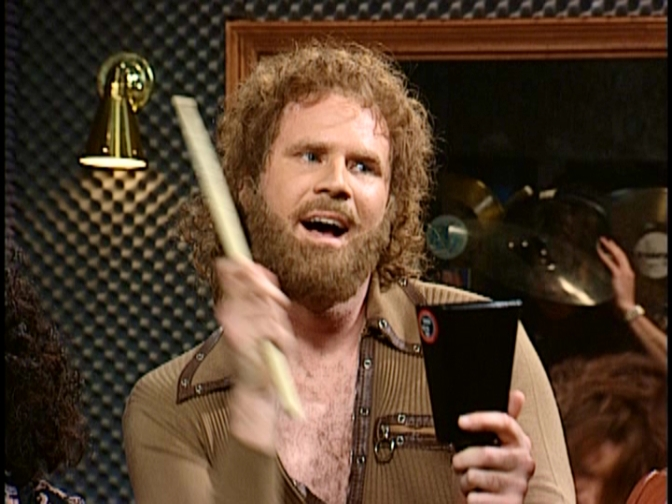

# RESULTS

## Import Libraries

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
%matplotlib inline

## Christopher Walken Film Data

In [4]:
# Use pandas to read CSV
walken = pd.read_csv('./csv/c_walken.csv')

# Test a few rows
walken[:8]

Critics_Score  Audience_Score                 Title             Character  \
0           0.29            0.85  The War With Grandpa               Jerry     
1           0.25            0.52   Wild Mountain Thyme         Tony Reilly     
2           0.20             NaN       The Jesus Rolls              Warden     
3           0.32            0.60     Irreplaceable You             Unknown     
4           0.17            0.25        Father Figures  Dr. Walter Tinkler     
5           0.94            0.86       The Jungle Book           King Louie    
6           0.14            0.41            Nine Lives       Felix Perkins     
7           0.81            0.82       Eddie the Eagle        Warren Sharp     

  Box_Revenue  Year  
0      $21.3M  2020  
1     $194.9K  2020  
2         NaN  2019  
3         NaN  2018  
4      $16.8M  2017  
5     $364.0M  2016  
6      $19.6M  2016  
7      $15.8M  2016

### Clean Up CSV: Box Office Totals

In [5]:
# CLEAN UP BOX OFFICE TOTALS BY YEAR

# Copy Revenue column
walken['box'] = walken['Box_Revenue']


# Replace $ and - values in the copied column
walken['box'] = walken['box'].str.replace('$', '', regex=False)
walken['box'] = walken['box'].str.replace('-', 'NaN')


# Replace M and K with corresponding 0s in millions and thousands
walken['box'] = walken['box'].replace(r'[KM]+$', '', regex=True).astype(float) * \
(walken['box'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))


# Format for printing if needed
total_revenue = walken['box'].sum()
total_formatted = "{:,}".format(total_revenue)

# Check Work
print(walken['box'][0])
print(f"Christopher Walken's movies have made a combined ${total_formatted}")

21300000.0
Christopher Walken's movies have made a combined $2,170,409,000.0


### Create Box Office Sum Column

In [6]:
# Add movie revenue together if in the same year
walken['year_sum'] = walken.groupby(['Year'])['box'].transform(sum)

### Make Variables with DF Sorted

In [7]:
# Sort by box office totals
box_sorted = walken.sort_values(by='box', ascending=True)


# Sort by year
year_sorted = walken.sort_values(by='Year', ascending=True) 

### Plot Data

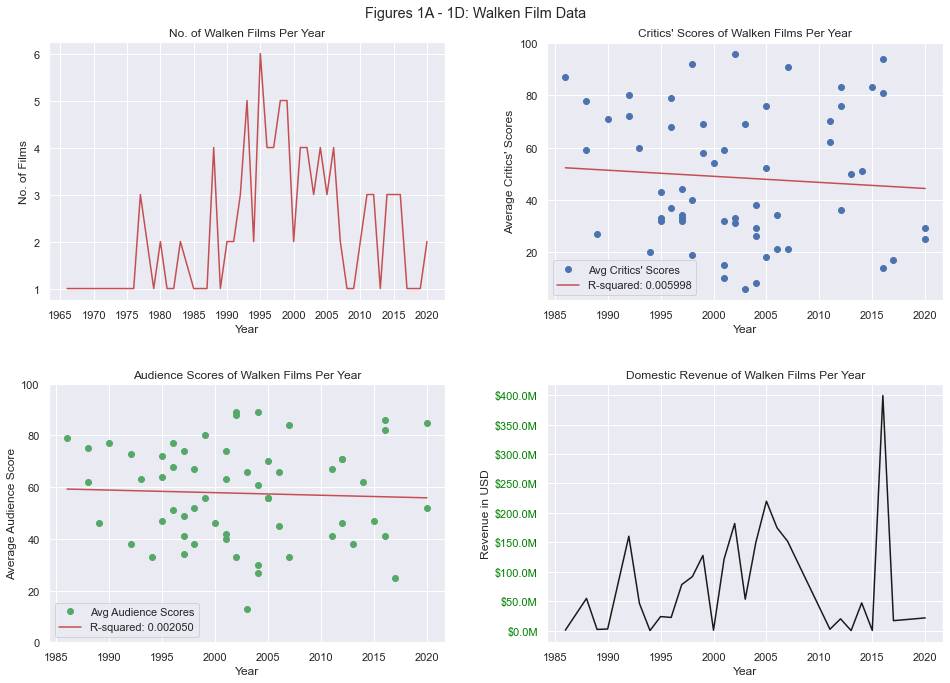

In [8]:
sns.set_theme(color_codes=True)

# Variable to shorten omitted NAs from columns
subset = ['Critics_Score', 'Audience_Score', 'box']

# Films per Year
x = year_sorted['Year'].unique()
y = year_sorted['Year'].value_counts().sort_index()

# Critic Scores
x2 = year_sorted.dropna(subset=subset).Year
y2 = (year_sorted.dropna(subset=subset).Critics_Score) * 100

# Audience Scores
x3 = year_sorted.dropna(subset=subset).Year
y3 = (year_sorted.dropna(subset=subset).Audience_Score) * 100

# Domestic Revenue
x4 = year_sorted.dropna(subset=subset).Year
y4 = year_sorted.dropna(subset=subset).year_sum


# Subplots layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(14)


# Title 
plt.title('Walken Film Data')


# Linear Regression
res2 = stats.linregress(x2, y2)
res3 = stats.linregress(x3, y3)
line = f"R-squared: {res2.rvalue**2:.6f}"
line2 = f"R-squared: {res3.rvalue**2:.6f}"


# X Ticks
xticks = np.arange(1960, 2030, 5)
xticks2 = np.arange(1985, 2021, 5)


# Y Ticks
yticks = np.arange(0, 110, 20)


# Plot
ax1.set_title('No. of Walken Films Per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Films')
ax1.set_xticks(xticks)
ax1.plot(x, y, 'r')

ax2.set_title("Critics' Scores of Walken Films Per Year")
ax2.set_xlabel('Year')
ax2.set_ylabel("Average Critics' Scores")
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks)
ax2.plot(x2, y2, 'bo', label="Avg Critics' Scores")
ax2.plot(x2, res2.intercept + res2.slope*x2, 'r', label=line)

ax3.set_title('Audience Scores of Walken Films Per Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Audience Score')

ax3.plot(x3, y3, 'go', label='Avg Audience Scores')
ax3.plot(x3, res3.intercept + res3.slope*x3, 'r', label=line2)
ax3.set_xticks(xticks2)
ax3.set_yticks(yticks)

ax4.set_title('Domestic Revenue of Walken Films Per Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('Revenue in USD')
ax4.set_xticks(xticks)
ax4.plot(x4, y4, 'k')


# Y ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax4.yaxis.set_major_formatter(millions)
ax4.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)


ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
ax3.ticklabel_format(useOffset=False)


fig.tight_layout(pad=3.0)
ax2.legend()
ax3.legend(loc='lower left')

fig.suptitle('Figures 1A - 1D: Walken Film Data')
plt.show()
fig.savefig('./plots/walkendata.png')

## Cowbell Songs

### Get Data from UltimateCowbell.com

In [9]:
# Import CSV of all cowbell songs
songs = pd.read_csv('./csv/cowbell1_4247.csv')


# Remove extra quote in string
songs['Song'] = songs['Song'].str.replace('"', '')
songs['Band'] = songs['Band'].str.replace('"', '')


# Exclude songs without a year
songs = songs.loc[songs["Year"] != 0]
songs = songs.loc[songs["Year"] != 'nan']

### Get Data from Rolling Stone

In [10]:
# Import Rolling Stone's Top 500 list
rs500 = pd.read_csv('./csv/rs500.csv')

### Graph Songs

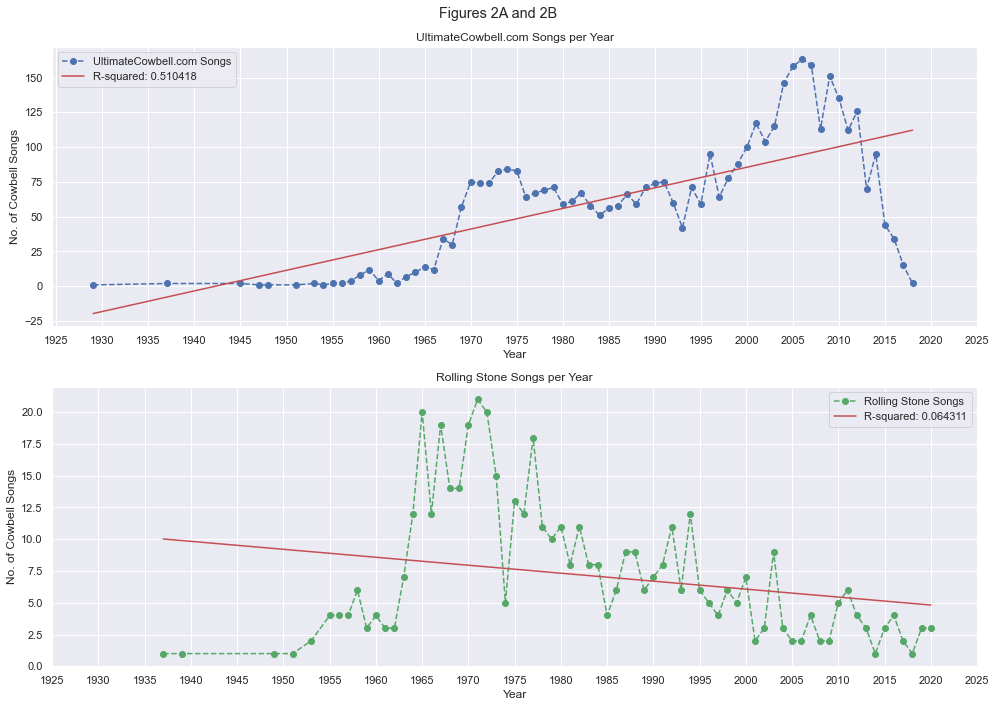

In [11]:
# Sort UltimateCowbell.com songs by year
year_songs = songs.sort_values(by='Year', ascending=True) 


# Sort by Rolling Stones songs by year
year_500 = rs500.sort_values(by='year', ascending=True)


# Define X and Y
# Cowbell songs by year / count
x = year_songs['Year'].dropna().unique()
y = year_songs['Year'].dropna().value_counts().sort_index()
x2 = year_500['year'].unique()
y2 = year_500['year'].value_counts().sort_index()


# Linear Regression
res1 = stats.linregress(x, y)
res2 = stats.linregress(x2, y2)
line1 = f"R-squared: {res1.rvalue**2:.6f}"
line2 = f"R-squared: {res2.rvalue**2:.6f}"


# Set Fig and Subplots
fig, (ax1, ax2) = plt.subplots(2)


# Figure Size
fig.set_figheight(10)
fig.set_figwidth(14)


# X and Y Labels
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs')
ax2.set_xlabel('Year')
ax2.set_ylabel('No. of Cowbell Songs')


# Plot
ax1.plot(x, y, 'b--o', label='UltimateCowbell.com Songs')
ax1.plot(x, res1.intercept + res1.slope*x, 'r', label=line1)
ax1.set_title('UltimateCowbell.com Songs per Year')

ax2.plot(x2, y2, 'g--o', label='Rolling Stone Songs')
ax2.plot(x2, res2.intercept + res2.slope*x2, 'r', label=line2)
ax2.set_title('Rolling Stone Songs per Year')


# Set X ticks 
xticks = np.arange(1925, 2030, 5)
ax1.set_xticks(xticks)
ax2.set_xticks(xticks)



# Legend and show 
ax1.legend()
ax2.legend()

fig.suptitle('Figures 2A and 2B')
fig.tight_layout()
plt.show()

### Pie Charts of Songs by Decade

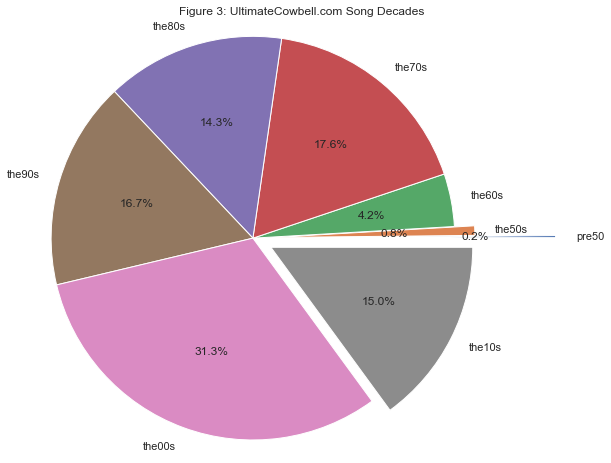

In [12]:
# ULTIMATECOWBELL.COM


# Shorten with variables
col = year_songs['Year']
ys = year_songs


# Songs by decade
pre50 = ys.loc[col < 1950].count()[0]
the50s = ys.loc[(col >= 1950) & (col < 1960)].count()[0]
the60s = ys.loc[(col >= 1960) & (col < 1970)].count()[0]
the70s = ys.loc[(col >= 1970) & (col < 1980)].count()[0]
the80s = ys.loc[(col >= 1980) & (col < 1990)].count()[0]
the90s = ys.loc[(col >= 1990) & (col < 2000)].count()[0]
the00s = ys.loc[(col >= 2000) & (col < 2010)].count()[0]
the10s = ys.loc[(col >= 2010) & (col < 2020)].count()[0]
the20s = ys.loc[(col >= 2020) & (col < 2030)].count()[0]


# Wedges and labels
decades = [pre50, the50s, the60s, the70s, the80s, the90s, the00s, the10s]
labels = ['pre50', 'the50s', 'the60s', 'the70s', 'the80s', 'the90s','the00s','the10s']


# Separate smaller wedges
explode = (0.5, 0.1, 0, 0, 0, 0, 0, 0.1)


# Subplots
fig1, ax1 = plt.subplots(figsize=(10, 8))


# Pie Chart
ax1.pie(decades, explode=explode, labels=labels, autopct='%1.1f%%')


# Title
plt.title('Figure 3: UltimateCowbell.com Song Decades')
plt.axis('equal')

# Show
plt.show()

UltimateCowbell.com has almost a third off all songs on their website released between 2000 - 2009.

Many of the bands and singles throughout, however, are not well known to the general public, which was the comparison I am seeking to make. More popular song lists are needed to compare to this cowbell list to see what popular songs *also* have cowbell.

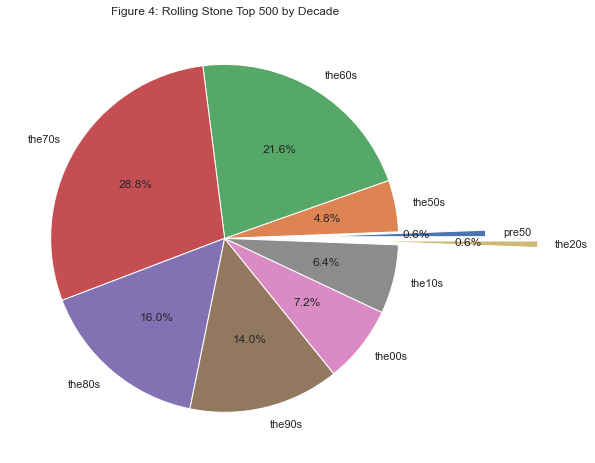

In [13]:
# ROLLING STONE GREATEST 500


# Shorten with variables
col = year_500['year']
y5 = year_500


# Songs by decade
pre50 = y5.loc[col < 1950].count()[0]
the50s = y5.loc[(col >= 1950) & (col < 1960)].count()[0]
the60s = y5.loc[(col >= 1960) & (col < 1970)].count()[0]
the70s = y5.loc[(col >= 1970) & (col < 1980)].count()[0]
the80s = y5.loc[(col >= 1980) & (col < 1990)].count()[0]
the90s = y5.loc[(col >= 1990) & (col < 2000)].count()[0]
the00s = y5.loc[(col >= 2000) & (col < 2010)].count()[0]
the10s = y5.loc[(col >= 2010) & (col < 2020)].count()[0]
the20s = y5.loc[(col >= 2020) & (col < 2030)].count()[0]


# Wedges and labels
decades = [pre50, the50s, the60s, the70s, the80s, the90s, the00s, the10s, the20s]
labels = ['pre50', 'the50s', 'the60s', 'the70s', 'the80s', 'the90s','the00s','the10s','the20s']


# Explode for smaller wedges
explode = (.5, 0, 0, 0, 0, 0, 0, 0, .8)


# Subplots
fig1, ax1 = plt.subplots(figsize=(10, 8))


# Pie Chart
ax1.pie(decades, explode=explode, labels=labels, autopct='%1.1f%%')


# Title
plt.title('Figure 4: Rolling Stone Top 500 by Decade')


# Show
plt.show()

As stated in the Introduction, the Rolling Stone Greatest 500 songs has a majority of the list items released between 1960 - 1979. 

A larger sample size is needed to cross-reference popular music to the cowbell song list, and some additional cowbell lists as well. 

## Create Main Cowbell List with Combined DataFrames

### Prepare the UltimateCowbell and Rolling Stone Data for Comparison

In [14]:
# Check Rolling Stone songs
print(rs500.song[60])


# Use regex to delete characters
rs500['song'] = rs500['song'].str.replace(r"[\"\',']", "", regex=True)
songs['Song'] = songs['Song'].str.replace(r"[\"\',']", "", regex=True)


# Re-check Rolling Stone song
print(rs500.song[60])


# Compare the same song on two lists
print(songs.Song[442])
print(rs500.song[51])

If I Ain't Got You'
If I Aint Got You
(Dont Fear) The Reaper
(Dont Fear) The Reaper


### Find Mutual Instances on Lists

In [15]:
# Combine songs that are in both CSVs
combo = rs500[rs500['song'].isin(songs.Song)].sort_values(by='artist', ascending=True) 


# Make a new df (32 songs)
newlist = pd.DataFrame(data=combo, columns=['artist', 'song', 'year'])

### Add Billboard Hot 100

In [16]:
# BILLBOARD HOT 100, ANNUALLY FROM 1970 - 2020


# Import CSV
bill = pd.read_csv('./csv/billboard.csv')


# Delete last 14 rows
n = 14
bill = bill.iloc[:-n]


# Delete any row with 'Artist(s)' or 'Song' in the Date column
bill = bill[bill.Date != 'Artist(s)']
bill = bill[bill.Date != 'Song']


# Delete special characters out of Songs to compare to other lists
bill['Single'] = bill['Single'].str.replace(r"[\"\',']", "", regex=True)


# Replace month names with numerals in Date column
newdates = {
    'Date': {
       'January': '1',
        'February': '2', 
        'March': '3',
        'April': '4',
        'May': '5',
        'June': '6', 
        'July': '7',
        'August': '8',
        'September': '9',
        'October': '10',
        'November': '11',
        'December': '12'}
}

bill.replace(newdates, regex=True, inplace=True)


# Only keep last 4 of string in Date column (year)
bill['Date'] = bill['Date'].str[-4:]


# Delete a few rows that are "off" and not relevant
bill.Date[bill.Date == 'Day"'].index.tolist()
bill = bill.drop(index=[628, 629, 630, 631, 632])


# Change Date column from string to int
bill['Date'] = pd.to_numeric(bill['Date'])
bill.count()

Num       869
Date      869
Artist    869
Single    869
dtype: int64

In [17]:
# Combine songs that on UltimateCowbell and Billboard
combo2 = songs[songs['Song'].isin(bill.Single)].sort_values(by='Band', ascending=True) 


# Make a new df 
newlist2 = pd.DataFrame(data=combo2, columns=['Band', 'Song', 'Year'])
newlist2.columns = ['artist', 'song', 'year']


# Check work
newlist2[:5]

artist                               song    year
102                    Amerie                   Need You Tonight  2002.0
183               B.J. Thomas                Hooked on a Feeling  1968.0
194  Bachman-Turner Overdrive          You Aint Seen Nothing Yet  1974.0
257               Barry White  Cant Get Enough of Your Love Babe  1974.0
317                  Bee Gees                        Jive Talkin  1975.0

In [18]:
# Read CSV
extrabell = pd.read_csv('./csv/extra_cowbell.csv')


# Make final df of cowbell songs
frames = [newlist, extrabell, newlist2]
final_list = pd.concat(frames)


# Drop duplicate songs
final_list = final_list.drop_duplicates(subset=['song'])


# Year from float to int
final_list['year'] = final_list['year'].astype(np.int64)

### Final Cowbell DataFrame

In [19]:
# DF sorted by year
final_list_year = final_list.sort_values(by='year', ascending=True) 


# Complete DF
final_list_year.to_csv(f'final.csv', sep=',', encoding='utf-8-sig', index = False)


# Check a few rows
final_list_year[:5]

artist                        song  year
158                  Chuck Berry               Promised Land  1964
250  The Jimi Hendrix Experience                 Purple Haze  1967
0                  Elvis Presley  A Little Less Conversation  1968
391     Sly and the Family Stone             Everyday People  1968
183                  B.J. Thomas         Hooked on a Feeling  1968

## Graph Final DataFrame Data

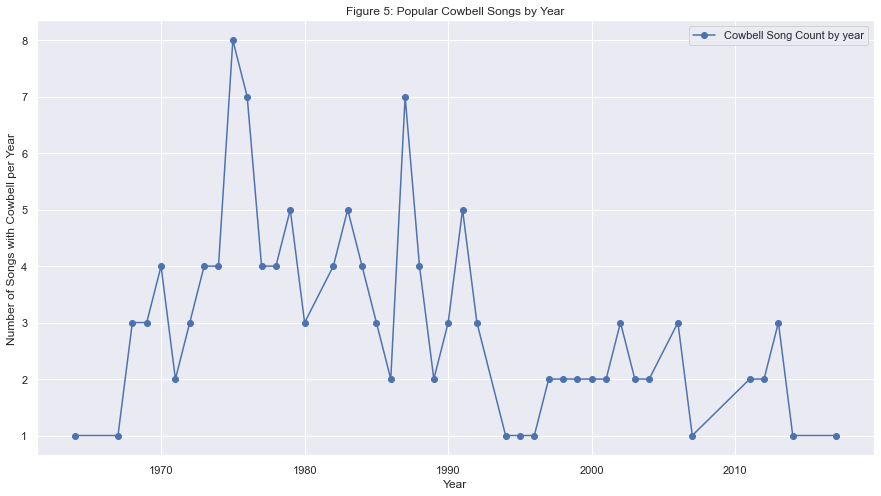

In [20]:
# Adjust size
plt.figure(figsize=(15,8))


# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()


# Title 
plt.title('Figure 5: Popular Cowbell Songs by Year')


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('Number of Songs with Cowbell per Year') 


# X Ticks- Every three years
plt.xticks = np.arange(1920, 2030, 5)


# Plot the graph
plt.plot(x, y, marker='o', label = 'Cowbell Song Count by year')


# Legend and Show
plt.legend()
plt.show()

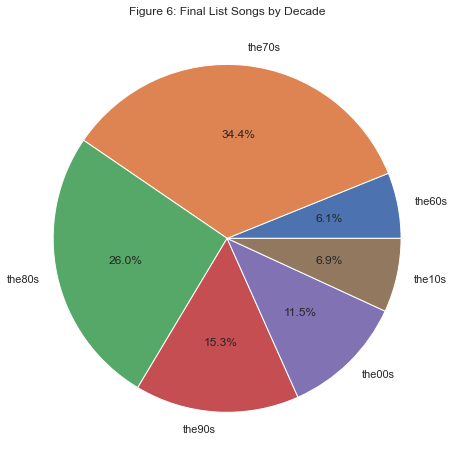

artist    131
song      131
year      131
dtype: int64

In [21]:
# Shorten with variables
col = final_list_year['year']
y = final_list_year


# Songs by decade

the60s = y.loc[(col >= 1960) & (col < 1970)].count()[0]
the70s = y.loc[(col >= 1970) & (col < 1980)].count()[0]
the80s = y.loc[(col >= 1980) & (col < 1990)].count()[0]
the90s = y.loc[(col >= 1990) & (col < 2000)].count()[0]
the00s = y.loc[(col >= 2000) & (col < 2010)].count()[0]
the10s = y.loc[(col >= 2010) & (col < 2020)].count()[0]
the20s = y.loc[(col >= 2020) & (col < 2030)].count()[0]


# Wedges and labels
decades = [the60s, the70s, the80s, the90s, the00s, the10s]
labels = ['the60s', 'the70s', 'the80s', 'the90s','the00s','the10s']


# Subplots
fig1, ax1 = plt.subplots(figsize=(8, 8))


# Pie Chart
ax1.pie(decades, labels=labels, autopct='%1.1f%%')


# Title
plt.title('Figure 6: Final List Songs by Decade')


# Show
plt.show()

final_list_year.count()

## Compare Walken Film Data to Cowbell Songs

### Number of Films and Number of Cowbell Songs by Year

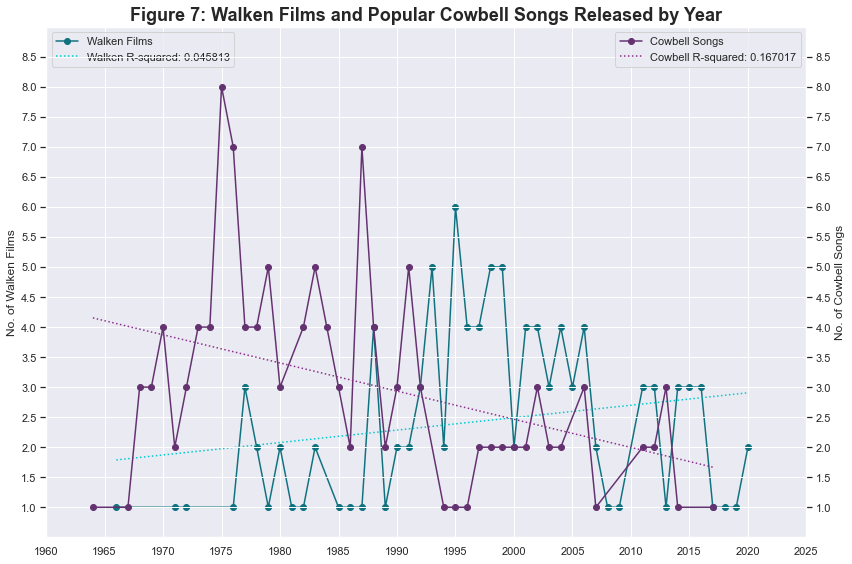

In [22]:
# Define X and Y
# Films per Year
x = year_sorted['Year'].unique()
y = year_sorted['Year'].value_counts().sort_index()
# Cowbell songs by year / count
x2 = final_list_year['year'].unique()
y2 = final_list_year['year'].value_counts().sort_index()


# Regression Lines
res1 = stats.linregress(x, y)
res2 = stats.linregress(x2, y2)
line1 = f"Walken R-squared: {res1.rvalue**2:.6f}"
line2 = f"Cowbell R-squared: {res2.rvalue**2:.6f}"


# Subplots
fig, ax = plt.subplots()


# Fig size
fig.set_figheight(8)
fig.set_figwidth(12)


# Title 
ax.set_title('Figure 7: Walken Films and Popular Cowbell Songs Released by Year', weight='bold', fontsize=18)


# Plot
ax2 = ax.twinx()
# Main markers
ax.plot(x, y, color='#10727F', marker='o', label='Walken Films')
ax2.plot(x2, y2, color='#653271', marker='o', label='Cowbell Songs')
# Regression
ax.plot(x, res1.intercept + res1.slope*x, color='#00C9CC', linestyle='dotted', label=line1)
ax2.plot(x2, res2.intercept + res2.slope*x2, color='#8B2D8B', linestyle='dotted', label=line2)


# X Range
ax.set(xlim=(1960,2025))


# X Ticks
xticks = np.arange(1960, 2030, 5)
ax.set_xticks(xticks)


# Y Range
ax.set(ylim=(0.5, 9))
ax2.set(ylim=(0.5, 9))


# Set Y ticks 
yticks = np.arange(1, 9, 0.5)
ax.set_yticks(yticks)
ax2.set_yticks(yticks)


# Set Y labels
ax.set_ylabel('No. of Walken Films')
ax2.set_ylabel('No. of Cowbell Songs')


# Show
fig.tight_layout() 
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
fig.savefig('./plots/films_songs.png')

In [23]:
# Pearson r: "Pearson correlation coefficient and p-value for testing non-correlation."
# Walken Films
a = year_sorted['Year'].unique()
b = year_sorted['Year'].value_counts().sort_index()

# Cowbell songs by year / count
a2 = final_list_year['year'].unique()
b2 = final_list_year['year'].value_counts().sort_index()

print(stats.pearsonr(a, b))
print(stats.pearsonr(a2, b2))

# Fail to reject null hypothesis

(0.21403939784327458, 0.15319160377377597)
(-0.408676924563284, 0.005883223510968559)


### Average Critics' Scores and Cowbell Songs by Year

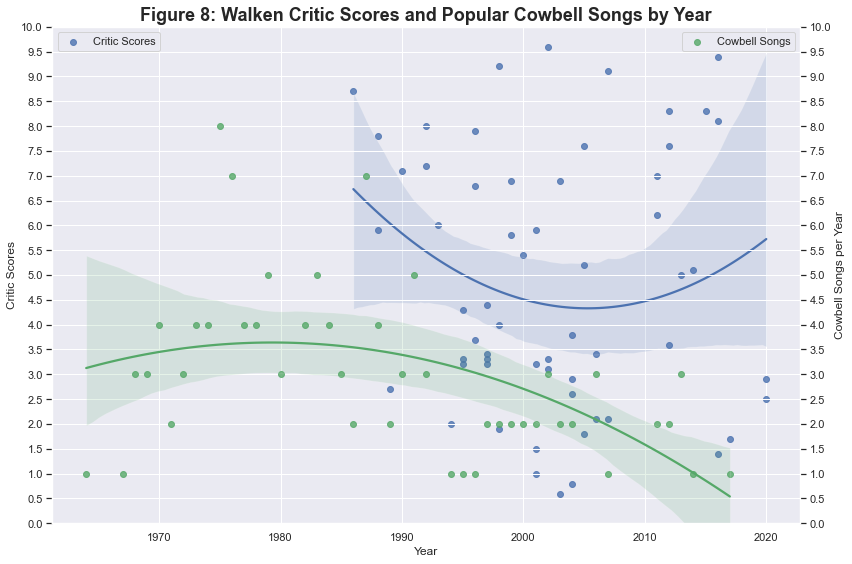

In [24]:
# Set seaborn theme
sns.set_theme(color_codes=True)


# Critic score sort by year
subset = ['Critics_Score', 'Audience_Score', 'box']

# Define X and Y
# Walken films by year / Critic Score
x = year_sorted.dropna(subset=subset).Year
y = (year_sorted.dropna(subset=subset).Critics_Score) * 10
# Cowbell songs by year / count
x2 = final_list_year['year'].unique()
y2 = final_list_year['year'].value_counts().sort_index()

# Subplots
fig, ax = plt.subplots()


# Fig size
fig.set_figheight(8)
fig.set_figwidth(12)


# Title 
ax.set_title('Figure 8: Walken Critic Scores and Popular Cowbell Songs by Year', weight='bold', fontsize=18)


# Plot
ax2 = ax.twinx()
sns.regplot(x=x, y=y, label="Critic Scores", data=final_list_year, order=2, ax=ax)
sns.regplot(x=x2, y=y2, label="Cowbell Songs", data=year_sorted, order=2, ax=ax2, color='g')


# Y Range
ax.set(ylim=(0, 10))
ax2.set(ylim=(0, 10))


# Set Y ticks 
yticks = np.arange(0, 10.5, 0.5)
ax.set_yticks(yticks)
ax2.set_yticks(yticks)


# Set Y labels
ax.set_ylabel('Critic Scores')
ax2.set_ylabel('Cowbell Songs per Year')


# Show
fig.tight_layout()  
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
fig.savefig('./plots/critic_songs.png')

In [25]:
# Pearson r: "Pearson correlation coefficient and p-value for testing non-correlation."

subset = ['Critics_Score', 'Audience_Score', 'box']

# Walken films by year / Critic Score
a = year_sorted.dropna(subset=subset).Year
b = (year_sorted.dropna(subset=subset).Critics_Score) * 100

# Cowbell songs by year / count
a2 = final_list_year['year'].unique()
b2 = final_list_year['year'].value_counts().sort_index()

print(stats.pearsonr(a, b))
print(stats.pearsonr(a2, b2))

# Fail to reject null hypothesis

(-0.07744810997203938, 0.5598672388344897)
(-0.408676924563284, 0.005883223510968559)


### Average Audience Scores and Cowbell Songs by Year

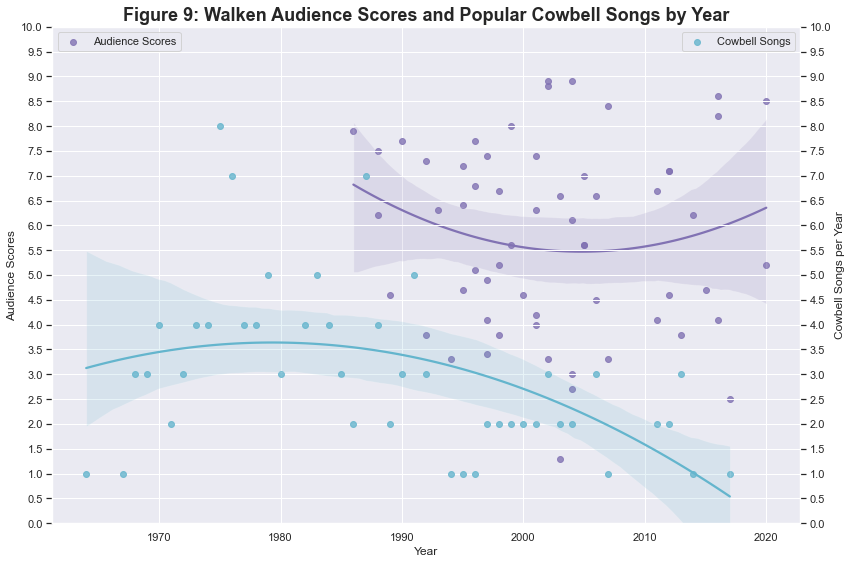

In [26]:
# Define X and Y
# Walken films by year / Audience Score
x = year_sorted.dropna(subset=subset).Year
y = (year_sorted.dropna(subset=subset).Audience_Score) * 10
# Cowbell songs by year / count
x2 = final_list_year['year'].unique()
y2 = final_list_year['year'].value_counts().sort_index()


# Subplots
fig, ax = plt.subplots()


# Fig size
fig.set_figheight(8)
fig.set_figwidth(12)


# Title 
ax.set_title('Figure 9: Walken Audience Scores and Popular Cowbell Songs by Year', weight='bold', fontsize=18)


# Plot
ax2 = ax.twinx()
sns.regplot(x=x, y=y, label="Audience Scores", data=final_list_year, order=2, ax=ax, color='m')
sns.regplot(x=x2, y=y2, label="Cowbell Songs", data=year_sorted, order=2, ax=ax2, color='c')


# Y Range
ax.set(ylim=(0, 10))
ax2.set(ylim=(0, 10))


# Set Y ticks 
yticks = np.arange(0, 10.5, 0.5)
ax.set_yticks(yticks)
ax2.set_yticks(yticks)


# Set Y labels
ax.set_ylabel('Audience Scores')
ax2.set_ylabel('Cowbell Songs per Year')


# Show
fig.tight_layout()  
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
fig.savefig('./plots/aud_songs.png')

In [27]:
# Pearson r: "Pearson correlation coefficient and p-value for testing non-correlation."

subset = ['Critics_Score', 'Audience_Score', 'box']

# Walken films by year / Audience Score
a = year_sorted.dropna(subset=subset).Year
b = (year_sorted.dropna(subset=subset).Audience_Score) * 100

# Cowbell songs by year / count
a2 = final_list_year['year'].unique()
b2 = final_list_year['year'].value_counts().sort_index()

print(stats.pearsonr(a, b))
print(stats.pearsonr(a2, b2))

# Fail to reject null hypothesis

(-0.04527167614089478, 0.7335005502261396)
(-0.408676924563284, 0.005883223510968559)


### Films' Domestestic Box Office Revenue and Cowbell Songs by Year

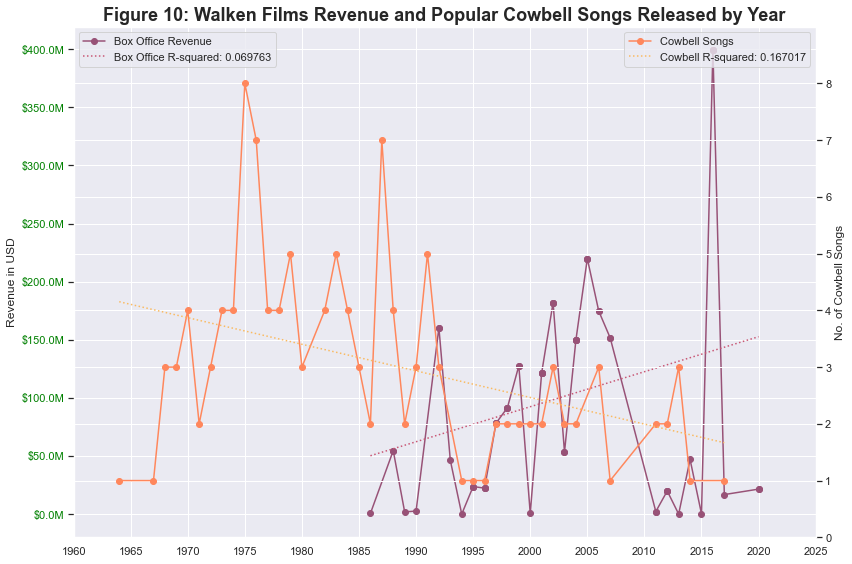

In [28]:
# Variable to shorten omitted NAs from columns
subset = ['Critics_Score', 'Audience_Score', 'box']


# Define X and Y
# Revenue per Year
x = year_sorted.dropna(subset=subset).Year
y = year_sorted.dropna(subset=subset).year_sum
# Cowbell songs by year / count
x2 = final_list_year['year'].unique()
y2 = final_list_year['year'].value_counts().sort_index()


# Regression Lines
res1 = stats.linregress(x, y)
res2 = stats.linregress(x2, y2)
line1 = f"Box Office R-squared: {res1.rvalue**2:.6f}"
line2 = f"Cowbell R-squared: {res2.rvalue**2:.6f}"


# Subplots
fig, ax = plt.subplots()


# Fig size
fig.set_figheight(8)
fig.set_figwidth(12)


# Title 
ax.set_title('Figure 10: Walken Films Revenue and Popular Cowbell Songs Released by Year', weight='bold', fontsize=18)


# Plot
ax2 = ax.twinx()
# Main markers
ax.plot(x, y, color='#985277', marker='o', label='Box Office Revenue')
ax2.plot(x2, y2, color='#FF875C', marker='o', label='Cowbell Songs')
# Regression
ax.plot(x, res1.intercept + res1.slope*x, color='#C85674', linestyle='dotted', label=line1)
ax2.plot(x2, res2.intercept + res2.slope*x2, color='#FABA61', linestyle='dotted', label=line2)


# X Range
ax.set(xlim=(1960,2025))


# X Ticks
xticks = np.arange(1960, 2030, 5)
ax.set_xticks(xticks)


# Y2 Range
ax2.set(ylim=(0, 9))

# Y1 Label
ax.set_ylabel('Revenue in USD')


# Set Y1 Ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax.yaxis.set_major_formatter(millions)
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)

# Set Y2 ticks 
yticks = np.arange(0, 8.5, 1)
ax2.set_yticks(yticks)


# Set Y labels
ax.set_ylabel('Revenue in USD')
ax2.set_ylabel('No. of Cowbell Songs')


# Show
fig.tight_layout() 
ax.legend(loc='upper left', frameon=True)
ax2.legend(frameon=True)
plt.show()
fig.savefig('./plots/box_songs.png')

In [29]:
# Pearson r: "Pearson correlation coefficient and p-value for testing non-correlation."

subset = ['Critics_Score', 'Audience_Score', 'box']

# Walken films by year / Audience Score
a = year_sorted.dropna(subset=subset).Year
b = year_sorted.dropna(subset=subset).year_sum

# Cowbell songs by year / count
a2 = final_list_year['year'].unique()
b2 = final_list_year['year'].value_counts().sort_index()

print(stats.pearsonr(a, b))
print(stats.pearsonr(a2, b2))

# Fail to reject null hypothesis

(0.2641268292209196, 0.04323411915194124)
(-0.408676924563284, 0.005883223510968559)


# CONCLUSION

### Summary

The data does not support any correlation between Christopher Walken's film career and popluar music with cowbell. 

I could not find any correlation within the data sets: 

**Number of Walken Films:**
* Correlation Coefficient: 0.214
* P-Value: 0.153

**Critics' Scores for Walken Films:**
* Correlation Coefficient: -0.077
* P-Value: 0.560

**Audience Scores for Walken Films:**
* Correlation Coefficient: -0.045
* P-Value: 0.734  

**Domestic Box Office Revenue for Walken Films:**
* Correlation Coefficient: 0.264
* P-Value: 0.043

**Cowbell Songs Released by Year**:
* Correlation Coefficient: -0.409
* P-Value: 0.006

Interesting note, the cowbell songs' data's p-value is statistically significant. However, due to a low correlation coefficient and effect size, we must reject the alternative hypothesis.  

### Further Study

A larger sample size of music data would have been ideal. As stated in the methodology section, I had:
* 111 Christopher Walken films
* 4284 songs with cowbell
* 1369 popular songs to find mutual instances with cowbell songs
* Final list of 130 songs mutual instances

**Walken**

Any Walken films missing data from Critics' Scores, Audience Scores and Box Office were omitted in a few graphs. Researching other sources to fill in the data could change the outcome of correlation. 

Sampling more ratings from other sources and using the mean as a data point for films in Critics' and Audience Scores would have made a larger sample size and stronger data. 

**Cowbell**

The cowbell is a common percussive instrument across genres.[(source)](https://www.musiciansfriend.com/cowbells) With enough time and resources, a much larger list can be made.

One option would be to have a program that listens to music and identifies if a cowbell is used. 

Another would be to scrape data from YouTube and music streaming sites like Spotify to look for users who made cowbell playlists, and then create a list from that data. 

Cross examing a larger popular music popluation could yield different results as well. The Billboard Hot 100 list only covers songs that have made it to the number 1 spot. It would be better to have the year-end Top 100 songs by year since 1950, plus adding different genres like Country Hits, Salsa Hits, etc. 4284 popular songs seems like a large sample at first, but  considering that approximately 289,000 singles were released just in 2020[(source)](https://en.wikipedia.org/wiki/Category:2020_singles), it is quite small.


While I have determined that I must fail to reject the null hypothesis with the data I collected, further data and study would be needed to strengthen the findings in this analysis. 